# Introduction
The goal of this project is to analyze a synthetic dataset from the National Parks Service. 

# Import Python Modules

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Loading the Data
In this analysis we are going to be examining two datasets. 

In [4]:
observations = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Analysis/Endangered%20Species/observations.csv')
species = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Analysis/Endangered%20Species/species_info.csv')

# Species
The species dataset consists of 4 columns: category, scientific name, common names, and conservation status. 

In [5]:
species.head()
print(f'There are unique {species.scientific_name.nunique()} species!')

There are unique 5541 species!


# Observations
The oberservations dataset consists 3 of columns: scientific name, park name, and number of observations.

In [6]:
observations.head()

scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

# Exploratory Data Analysis (EDA)
To begin our exploratory data analysis we are going to join our datasets so we can compare variables.

In [7]:
df = observations.merge(species, how='inner')
df.head()

scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN

In [8]:
observations_shape = observations.shape
species_shape = species.shape
df_shape = df.shape
print(f'The species has {species_shape[0]} rows and {species_shape[1]} columns while observations has {observations_shape[0]} rows and {observations_shape[1]} columns.')
print(f'Together, the merged dataframe has {df_shape[0]} rows and {df_shape[1]} columns.')

The species has 5824 rows and 4 columns while observations has 23296 rows and 3 columns.
Together, the merged dataframe has 25632 rows and 6 columns.


In [9]:
df.describe()

observations
count  25632.000000
mean     142.214693
std       69.912475
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000

## What are the average number of animal observations at each park?

In [10]:
mean_observations = df.groupby('park_name')['observations'].mean()
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(16,8))
plt.bar(mean_observations.index, mean_observations)
plt.title('Animal oberservations per park')
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

According to our bar graph, it appears that Yellowstone has the highest mean animal observations. This means that, on average, more animals are observed in Yellowstone compared to other areas. However, it's important to note that the mean value can be greatly influenced by outliers. For instance, if there is a common animal in the area that is consistently present, it could be skewing the average for Yellowstone. Despite this, if you want to maximize your chances of seeing more animals, it seems that Yosemite is your best bet.

# Data Scrubbing

In [11]:
df.conservation_status.fillna('Least Concern', inplace=True)
df.groupby('conservation_status').sum()

observations
conservation_status              
Endangered                   3513
In Recovery                  2107
Least Concern             3542326
Species of Concern          93962
Threatened                   3339

In [12]:
df.isna().sum()

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64

# Analysis

In [13]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0

Text(0.5, 0, 'Conservation Status')

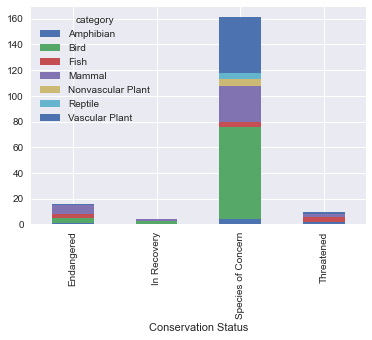

In [14]:
ax = conservationCategory.plot(kind='bar', stacked=True)
ax.set_xlabel('Conservation Status')

It is evident from this graph that birds and vascular plants are the species of most concern. When comparing their ratios to their endangered ratios, they appear to be quite similar. We will investigate whether this similarity is statistically significant in our later analysis.

# Statistical Significance
As we stated earlier, we believe that there may be something statistically significant about the species of concern and endangered species when comparing birds and vascular plants. Our null hypothesis is that there is no relationship between the two; thus, they do not influence each other. Our alternative hypothesis is that the population of species of concern for vascular plants and birds influences the population of endangered vascular plants and birds.

In [15]:
from scipy.stats import chi2_contingency
                                        
contingency_table = np.array([[72, 43], #Concern, Bird, Vascular Plant
                     [4, 1]])            #Endangered
chi2_stat, pvalue, dof, exp = chi2_contingency(contingency_table)
chi2_stat

0.0998543790305804

Given a significance level of 0.05 (alpha), we cannot reject the null hypothesis in favor of the alternative because our p-value was approximately 0.09. Therefore, it is statistically reasonable to conclude that the populations of species of concern for birds and vascular plants do not have a significant impact on the population of endangered birds and vascular plants.